<font size="12" >Skip Lists</font> <br>
<font size="4" >Student: Felipe C.</font>


In [2]:
import matplotlib.pyplot as plt
import random
import time
import numpy as np
import math

### Pseudocode for Search in Skip List

```plaintext
Search(list, searchKey)
    x := list→header
    -- loop invariant: x→key < searchKey
    for i := list→level downto 1 do
        while x→forward[i]→key < searchKey do
            x := x→forward[i]
    -- x→key < searchKey ≤ x→


### Pseudocode for Random Level in Skip List

```plaintext
randomLevel()
    lvl := 1
    -- random() returns a random value in [0...1)
    while random() < p and lvl < MaxLevel do
        lvl := lvl + 1
    return lvl


### Pseudocode for insertion in Skip List

```plaintext
Insert(list, searchKey, newValue)
    local update[1..MaxLevel]
    x := list→header
    for i := list→level downto 1 do
        while x→forward[i]→key < searchKey do
            x := x→forward[i]
        -- x→key < searchKey ≤ x→forward[i]→key
        update[i] := x
    x := x→forward[1]
    if x→key = searchKey then
        x→value := newValue
    else
        lvl := randomLevel()
        if lvl > list→level then
            for i := list→level + 1 to lvl do
                update[i] := list→header
            list→level := lvl
        x := makeNode(lvl, searchKey, value)
        for i := 1 to level do
            x→forward[i] := update[i]→forward[i]
            update[i]→forward[i] := x


### Pseudocode for deletion in Skip List

```plaintext
Delete(list, searchKey)
    local update[1..MaxLevel]
    x := list→header
    for i := list→level downto 1 do
        while x→forward[i]→key < searchKey do
            x := x→forward[i]
        update[i] := x
    x := x→forward[1]
    if x→key = searchKey then
        for i := 1 to list→level do
            if update[i]→forward[i] ≠ x then
                break
            update[i]→forward[i] := x→forward[i]
        free(x)
        while list→level > 1 and list→header→forward[list→level] = NIL do
            list→level := list→level – 1


## Implementation:

In [3]:

class SkipListNode:
    def __init__(self, value, level):
        self.value = value
        self.forward = [None] * (level + 1)     # level 0 is the lowest
 
    
class SkipList:
    def __init__(self, max_level, p):
        self.max_level = max_level
        self.p = p
        self.header = self.create_node(self.max_level, None)
        self.level = 0

        

    def create_node(self, lvl, value):
        return SkipListNode(value, lvl)
    
    def random_level(self):
        lvl = 0
        while random.random() < self.p and lvl < self.max_level:
            lvl += 1
        return lvl
    
    def search(self,search_value):
        x = self.header
        update = [None] * (self.max_level + 1)
        
        for i in range(self.level, -1, -1):
            while x.forward[i] and x.forward[i].value < search_value:
                x = x.forward[i]
            update[i] = x
        
        x = x.forward[0]
        if x and x.value == search_value:
            return x, update
        else:
            return None, update
    
    def insert(self,value):
        x, update = self.search(value)
        
        
        lvl = self.random_level()
        if lvl > self.level:
            for i in range(self.level + 1, lvl + 1):
                update[i] = self.header
            self.level = lvl
        
        new_node = self.create_node(lvl, value)
        for i in range(lvl + 1):
            new_node.forward[i] = update[i].forward[i]
            update[i].forward[i] = new_node

    def delete(self,value):
        x, update = self.search(value)
        if x:
            for i in range(self.level + 1):
                if update[i].forward[i] != x:
                    break
                update[i].forward[i] = x.forward[i]

            while self.level > 0 and self.header.forward[self.level] is None:
                self.level -= 1


    def display_list(self):
        print("\nSkip List:")
        print(f"Level 0: ", end=" ")
        node = self.header.forward[0]
        
        level_0_values = []
        while node:
            level_0_values.append(node.value)
            node = node.forward[0]
        
        
        for i in level_0_values:
            print(i, end=" ")
        print("")
        for i in range(1,self.level + 1):
            print(f"Level {i}: ", end=" ")
            node = self.header.forward[i]

            level_values = []
            while node:
                level_values.append(node.value)
                node = node.forward[i]
            
            for j in level_0_values:
                if j in level_values:
                    print(j, end=" ")
                else:
                    print("_", end=" ")
            print("")



## Analysis:

### Inserting:

We will be inserting n elements in 3 diferent skip lists, n ∈ {256, 4.096, 65536} 

In [4]:
sizes = [256 , 4096, 65536]
def insert_scan(p,sizes):
    times_ins = []
    skip_lists = []
    for size in sizes:
        max_layer = math.ceil(math.log(size, 1/p))
        sk_list = SkipList(max_layer,p)
        number_range = size//2
        begin_time = time.time()
        for i in range(size):
            sk_list.insert(random.randint(0, number_range))
        end_time = time.time()
        times_ins.append(end_time-begin_time)
        skip_lists.append(sk_list)
    return times_ins,skip_lists
times_ins,skip_lists = insert_scan(0.5,sizes)
for i,size in enumerate(sizes):
    print(f"Time to insert {size} elements: {times_ins[i]}")

Time to insert 256 elements: 0.0012524127960205078
Time to insert 4096 elements: 0.03805041313171387
Time to insert 65536 elements: 0.8226277828216553


### Deleting:

In this analysis we will delete 20% of the inserted elements 

In [10]:
def delete_scan(sizes,skip_lists):
    times_del = []
    for j,size in enumerate(sizes):
        number_range = size//2
        number_deletions = math.floor(size*0.2)
        sk_list = skip_lists[j]
        begin_time = time.time()
        for i in range(number_deletions):
            sk_list.delete(random.randint(0, number_range))
        end_time = time.time()
        times_del.append(end_time-begin_time)
    return times_del
times_del = delete_scan(sizes,skip_lists)
for i,size in enumerate(sizes):
    print(f"Time to delete {math.floor(size*0.2)} elements: {times_del[i]}")

Time to delete 51 elements: 0.0010533332824707031
Time to delete 819 elements: 0.04202628135681152
Time to delete 13107 elements: 0.43892455101013184


In [11]:
probability = [0.01,0.2,0.5,0.8,0.95]
results = {}
for p in probability:
    times_ins,skip_lists = insert_scan(p,sizes)
    times_del = delete_scan(sizes,skip_lists)
    results[p] = (times_ins,times_del)
    print(f"p = {p} \n ")
    for i,size in enumerate(sizes):
        print(f"Time to insert {size} elements: {times_ins[i]}")
        print(f"Time to delete {math.floor(size*0.2)} elements: {times_del[i]}")

p = 0.01 
 
Time to insert 256 elements: 0.006704807281494141
Time to delete 51 elements: 0.0015006065368652344
Time to insert 4096 elements: 0.06981849670410156
Time to delete 819 elements: 0.01781749725341797
Time to insert 65536 elements: 4.496106863021851
Time to delete 13107 elements: 1.1496882438659668
p = 0.2 
 
Time to insert 256 elements: 0.001341104507446289
Time to delete 51 elements: 0.0003764629364013672
Time to insert 4096 elements: 0.027904510498046875
Time to delete 819 elements: 0.0061724185943603516
Time to insert 65536 elements: 1.1949925422668457
Time to delete 13107 elements: 0.16622519493103027
p = 0.5 
 
Time to insert 256 elements: 0.0012352466583251953
Time to delete 51 elements: 0.0003082752227783203
Time to insert 4096 elements: 0.026426076889038086
Time to delete 819 elements: 0.006298542022705078
Time to insert 65536 elements: 1.195981740951538
Time to delete 13107 elements: 0.14047789573669434
p = 0.8 
 
Time to insert 256 elements: 0.0018596649169921875
T

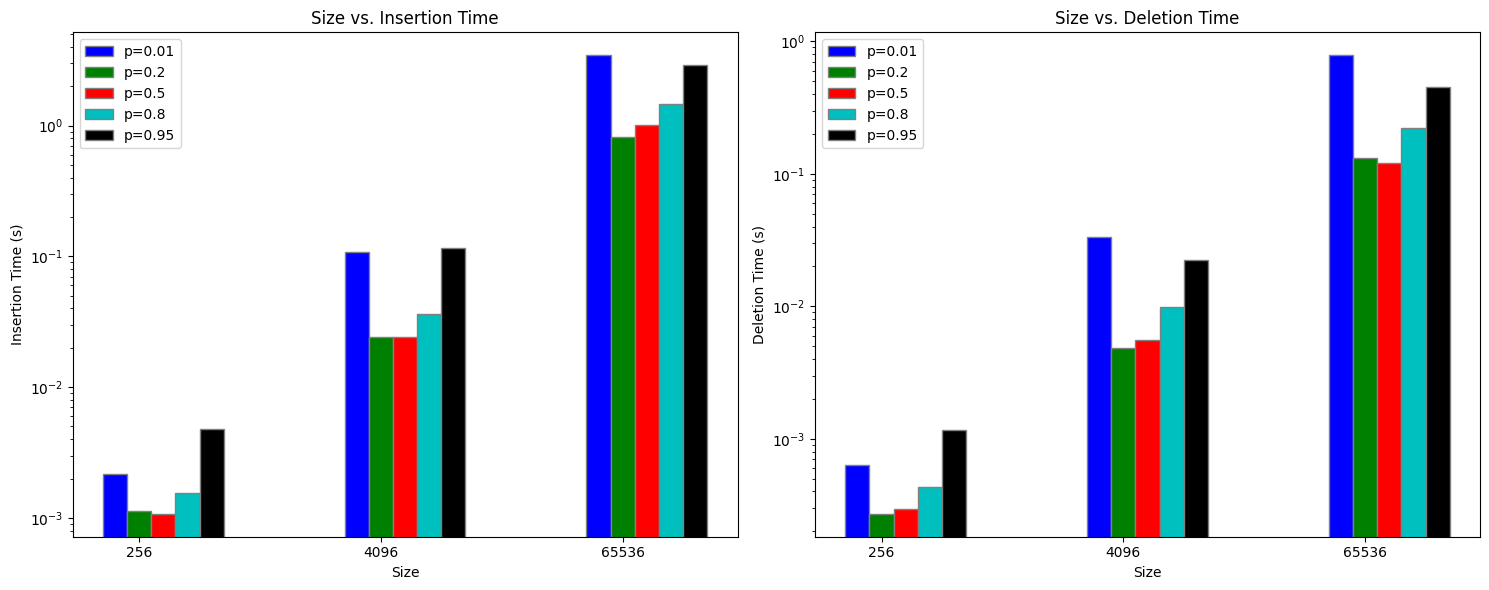

In [7]:
colors = ['b', 'g', 'r', 'c','k']
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))


bar_width = 0.1


r1 = np.arange(len(sizes))
for idx, p in enumerate(probability):
    times_ins, times_del = results[p]
    
    ax1.bar(r1 + idx * bar_width, times_ins, color=colors[idx], width=bar_width, edgecolor='grey', label=f'p={p}')
    

    ax2.bar(r1 + idx * bar_width, times_del, color=colors[idx], width=bar_width, edgecolor='grey', label=f'p={p}')


ax1.set_xlabel('Size')
ax1.set_ylabel('Insertion Time (s)')
ax1.set_title('Size vs. Insertion Time')
ax1.set_xticks([r + bar_width for r in range(len(sizes))])
ax1.set_xticklabels(sizes)
ax1.set_yscale('log')
ax1.legend()


ax2.set_xlabel('Size')
ax2.set_ylabel('Deletion Time (s)')
ax2.set_title('Size vs. Deletion Time')
ax2.set_xticks([r + bar_width for r in range(len(sizes))])
ax2.set_xticklabels(sizes)
ax2.set_yscale('log')
ax2.legend()


plt.tight_layout()
plt.show()

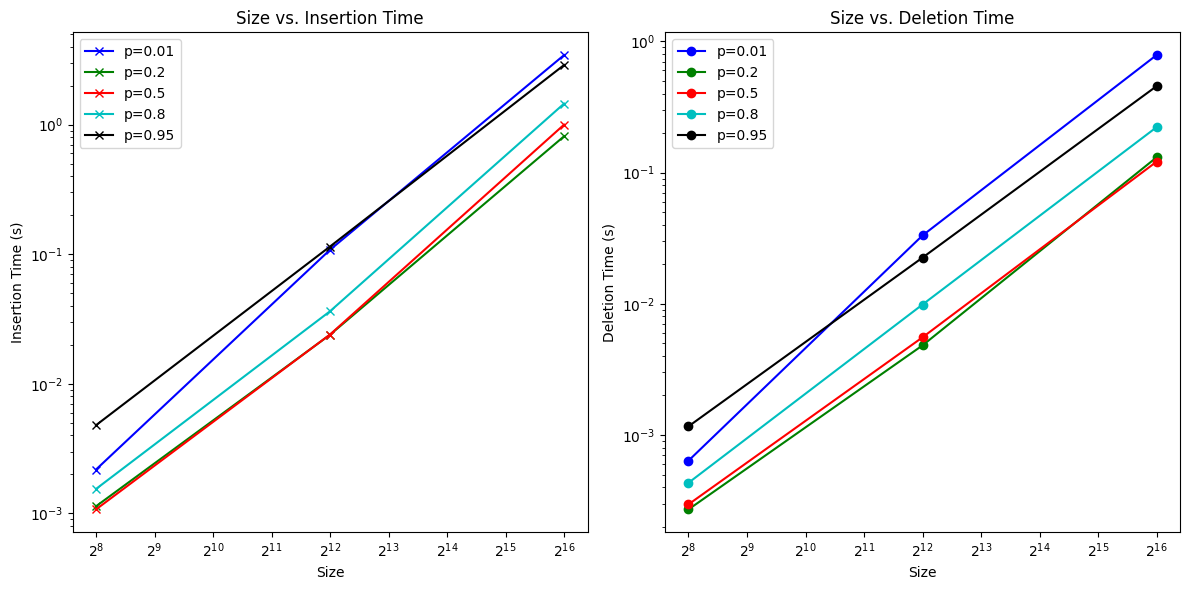

In [8]:

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

for idx, p in enumerate(probability):
    times_ins, times_del = results[p]
    
    
    ax1.plot(sizes, times_ins, marker='x', color=colors[idx], label=f'p={p}')
    
    
    ax2.plot(sizes, times_del, marker='o', color=colors[idx], label=f'p={p}')

ax1.set_title('Size vs. Insertion Time')
ax1.set_xlabel('Size')
ax1.set_ylabel('Insertion Time (s)')
ax1.set_xscale('log', base=2)
ax1.set_yscale('log')
ax1.legend()

ax2.set_title('Size vs. Deletion Time')
ax2.set_xlabel('Size')
ax2.set_ylabel('Deletion Time (s)')
ax2.set_xscale('log', base=2)
ax2.set_yscale('log')
ax2.legend()


plt.tight_layout()
plt.show()

By plotting the times for insertion and deletion on a logarithmic scale, we observe that the results form straight lines, which confirms the expected (O(log n)) complexity for both operations. Varying the probability (p) allows us to adjust the average height of elements in the skip list. The results indicate that (p = 0.5) is an optimal choice. A lower (p) causes the skip list to resemble a normal linked list, resulting in higher insertion and deletion times. Conversely, a higher (p) increases the height of nearly every element, which also impacts performance negatively. Thus, (p = 0.5) balances the trade-off, providing efficient skip list operations.
